<a href="https://colab.research.google.com/github/josealfon/Hands-On-Meta-Learning-With-Python/blob/master/Practical_Machine_Learning_with_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports and Loading Data

In [0]:
# for compatibility
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow.keras import layers

# Converts a class vector (integers) to binary class matrix.
from tensorflow.keras.utils import to_categorical
import numpy as np

print(tf.VERSION)
print(tf.keras.__version__)

1.14.0-rc1
2.2.4-tf


In [0]:
(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.mnist.load_data()
print('Original shape: ',train_data.shape, train_labels.shape, test_data.shape, test_labels.shape)

Original shape:  (60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [0]:
train_data = train_data.reshape(-1, 28, 28, 1)
test_data = test_data.reshape(-1, 28,28, 1)

# Normalize the data
train_data = train_data.astype('float32')/255
test_data = test_data.astype('float32')/255

print('After reshape and normalize: ',train_data.shape, test_data.shape, train_labels.shape, test_labels.shape)

After reshape and normalize:  (60000, 28, 28, 1) (10000, 28, 28, 1) (60000,) (10000,)


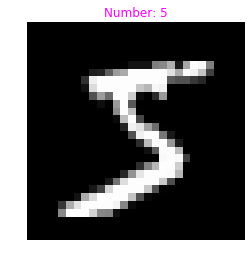

In [0]:
# Plot the 1st train data with it's label
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(np.squeeze(train_data[0]), cmap='gray')
plt.title('Number: {}'.format(train_labels[0]), color='magenta')
plt.axis('off')
plt.show()

In [0]:
# This will and a column corresponding to 0-9 digits
# and put 1 in the appropiate column for the each label, 0 in the other ones
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

print(train_data.shape, test_data.shape, train_labels.shape, test_labels.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1) (60000, 10) (10000, 10)


# Sequential Model

In [0]:
# define a sequential model
model = tf.keras.Sequential()

# adding layers to the model
model.add(layers.Dense(64, activation='relu'))
# add another one of fully connected layer
model.add(layers.Dense(64, activation='relu'))
# try different activation for the classification layer, like softmax
model.add(layers.Dense(10, activation='softmax'))

W0628 10:23:11.161536 139704221480832 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
# Create a sigmoid layer:
layers.Dense(64, activation='sigmoid')
# Or:
layers.Dense(64, activation=tf.sigmoid)

# A linear layer with L1 regularization of factor 0.01 applied to the kernel matrix:
layers.Dense(64, kernel_regularizer=tf.keras.regularizers.l1(0.01))

# A linear layer with L2 regularization of factor 0.01 applied to the bias vector:
layers.Dense(64, bias_regularizer=tf.keras.regularizers.l2(0.01))

# Initializer that generates tensors with a normal distribution:
layers.Dense(64, kernel_initializer='random_normal')

# A linear layer with a bias vector initialized to 2.0s:
layers.Dense(64, bias_initializer=tf.keras.initializers.constant(2.0))

W0628 10:23:11.190575 139704221480832 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/initializers.py:143: calling RandomNormal.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
# another way to defining the model instead of writing model.add everytime
# Let's create the model to classify the MNIST data
model = tf.keras.Sequential([
    # This is not using a Dense layer, rather this is a Convolutional layer
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    # This is a Max Pooling layer
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    # This layer flattens the output of the conv layers to a long vector
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 64)               

In [0]:
# We can configure the model training in a variety of ways
model.compile(optimizer=tf.train.AdamOptimizer(0.01),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

# Configure a model for categorical classification.
model.compile(optimizer=tf.train.RMSPropOptimizer(0.01),
             loss=tf.keras.losses.categorical_crossentropy,
             metrics=[tf.keras.metrics.categorical_accuracy])

# Configure a model for mean-squared error regression.
model.compile(optimizer=tf.train.AdamOptimizer(0.01),
              loss='mse',       # mean squared error
              metrics=['mae'])  # mean absolute error

# We will using the last one
# We are calling the optimizer by name
model.compile(optimizer='adam', # this will use the default learning rate of 0.001
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [0]:
model.fit(train_data,
          train_labels,
          epochs=5,
          batch_size=32,
          validation_data=(test_data, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 9s 152us/sample - loss: 0.1395 - acc: 0.9574 - val_loss: 0.0592 - val_acc: 0.9816
Epoch 2/5
60000/60000 [==============================] - 7s 120us/sample - loss: 0.0456 - acc: 0.9855 - val_loss: 0.0348 - val_acc: 0.9889
Epoch 3/5
60000/60000 [==============================] - 7s 120us/sample - loss: 0.0332 - acc: 0.9895 - val_loss: 0.0304 - val_acc: 0.9910
Epoch 4/5
60000/60000 [==============================] - 7s 120us/sample - loss: 0.0244 - acc: 0.9926 - val_loss: 0.0331 - val_acc: 0.9904
Epoch 5/5
60000/60000 [==============================] - 7s 120us/sample - loss: 0.0201 - acc: 0.9937 - val_loss: 0.0311 - val_acc: 0.9913


In [0]:
# Make Predictions
results = model.predict(test_data)
print('Prediction shape: ', results.shape)

Prediction shape:  (10000, 10)


In [0]:
# Evaluate the model
print('Model evaluation: ')
model.evaluate(test_data, test_labels, batch_size=32)

Model evaluation: 
10000/10000 [==============================] - 1s 62us/sample - loss: 0.0311 - acc: 0.9913


[0.031130135284434073, 0.9913]

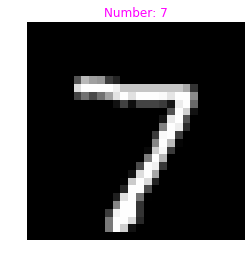

In [0]:
def check_pred(index):
  # Testing the prediction for the 1st number
  plt.figure()
  plt.imshow(np.squeeze(test_data[index]), cmap='gray')
  # We are using np.argmax since the labels are in categorical form
  plt.title('Number: {}'.format(np.argmax(results[index])), color='magenta')
  plt.axis('off')
  plt.show()
  
# check the prediction for the 0th test example
check_pred(0)

# Functional API

In [0]:
# Make an input tensor
inputs = tf.keras.Input(shape=(28,28,1))

# A layer instance is callable on a tensor, and returns a tensor.
x = layers.Conv2D(filters=32, kernel_size=(3,3), strides=2, activation='relu')(inputs)
# We have to provide the input for each layer manually
# This is how we can make arbitrary connections
x = layers.Conv2D(filters=64, kernel_size=(3,3),strides= 2, activation='relu')(x)
# Notice how we are using the same variable x, as python performs the operation first then the assignment
x = layers.Conv2D(filters=64, kernel_size=(3,3),strides=2, padding='same', activation='relu')(x)
x = layers.Flatten()(x)
x = layers.Dense(128, activation='relu')(x)
# This is the output tensor
preds = layers.Dense(10, activation='softmax')(x)

In [0]:
# Now we pass the input and output tensors to the tf.keras.Model instance
model = tf.keras.Model(inputs=inputs, outputs=preds)

In [0]:
# Compile
model.compile(optimizer=tf.train.AdamOptimizer(learning_rate=0.001),
             loss=tf.keras.losses.categorical_crossentropy,
             metrics=['accuracy'])

In [0]:
# Train
model.fit(train_data, train_labels, batch_size=32, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 6s 106us/sample - loss: 0.1637 - acc: 0.9503
Epoch 2/5
60000/60000 [==============================] - 6s 104us/sample - loss: 0.0567 - acc: 0.9824
Epoch 3/5
60000/60000 [==============================] - 6s 104us/sample - loss: 0.0377 - acc: 0.9880
Epoch 4/5
60000/60000 [==============================] - 6s 104us/sample - loss: 0.0288 - acc: 0.9905
Epoch 5/5
60000/60000 [==============================] - 6s 103us/sample - loss: 0.0220 - acc: 0.9924


In [0]:
# Evaluate
model.evaluate(test_data, test_labels)

10000/10000 [==============================] - 1s 71us/sample - loss: 0.0384 - acc: 0.9877


[0.03841769770964747, 0.9877]

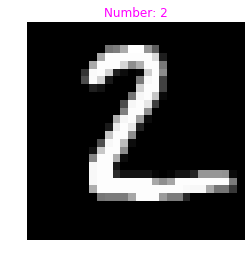

In [0]:
# check the prediction for the 1st test example
check_pred(1)

# Model Subclassing

In [0]:
class MyModel(tf.keras.Model):
  def __init__(self, num_classes):
    super(MyModel, self).__init__(name='my_model')
    self.num_classes = num_classes
    # Defining the layers
    self.conv_1 = layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1))
    self.maxpool_1 = layers.MaxPooling2D(pool_size=(2,2))
    self.conv_2 = layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu')
    self.maxpool_2 = layers.MaxPooling2D(pool_size=(2,2))
    self.conv_3 = layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu')
    self.flat = layers.Flatten()
    self.dense_1 = layers.Dense(64, activation='relu')
    self.dense_2 = layers.Dense(10, activation='softmax')
    
  def call(self, inputs):
    # In this method we define our forward pass using layers created in init
    x = self.conv_1(inputs)
    x = self.maxpool_1(x)
    x = self.conv_2(x)
    x = self.maxpool_2(x)
    x = self.conv_3(x)
    x = self.flat(x)
    x = self.dense_1(x)
    return self.dense_2(x)
  
  def compute_output_shape(self, input_shape):
    # You need to override this function if you want to use the subclassed model
    # as part of a functional-style model.
    # Otherwise, this method is optional.
    shape = tf.TensorShape(input_shape).as_list()
    shape = [shape[0], self.num_classes]
    print(shape)
    return tf.TensorShape(shape)

In [0]:
# Create the model instance
model = MyModel(num_classes=10)

# Compile
model.compile(optimizer=tf.train.RMSPropOptimizer(0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Trains for 5 epochs.
model.fit(train_data, train_labels, batch_size=32, epochs=5)

W0628 10:24:24.928772 139704221480832 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/training/rmsprop.py:119: calling Ones.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Epoch 1/5
60000/60000 [==============================] - 7s 109us/sample - loss: 0.2484 - acc: 0.9172
Epoch 2/5
60000/60000 [==============================] - 6s 108us/sample - loss: 0.0425 - acc: 0.9873
Epoch 3/5
60000/60000 [==============================] - 7s 112us/sample - loss: 0.0308 - acc: 0.9907
Epoch 4/5
60000/60000 [==============================] - 6s 106us/sample - loss: 0.0242 - acc: 0.9930
Epoch 5/5
60000/60000 [==============================] - 6s 106us/sample - loss: 0.0198 - acc: 0.9943


In [0]:
model.evaluate(test_data, test_labels)

10000/10000 [==============================] - 1s 73us/sample - loss: 0.0274 - acc: 0.9928


[0.027365948004324098, 0.9928]

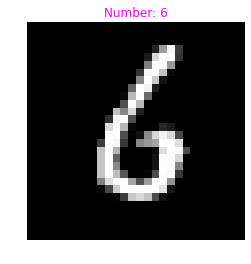

In [0]:
# check the prediction for the 50th test example
check_pred(50)

# Callbacks

In [0]:
# Writing a learning rate reducer function, takes epoch as parameter
def reducer(epoch):
  # increase epoch by 1 as epochs are counted from 0
  epoch = epoch + 1
  if epoch<5:
    return 0.001
  else:
    # the return of the scheduler must be a float
    return 0.001 * np.exp(0.1 * (5 - epoch))
  
callbacks = [
    # Stop the training if the validation loss stops improving after 3 epochs
    tf.keras.callbacks.EarlyStopping(patience=3, monitor = 'val_loss'),
    # Decrease the learning rate gradually if the number of epochs exceeds 5
    tf.keras.callbacks.LearningRateScheduler(reducer)
]

In [0]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
model.fit(train_data, train_labels, epochs=10, callbacks=callbacks,
          validation_data=(test_data, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 132us/sample - loss: 0.0214 - acc: 0.9937 - val_loss: 0.0455 - val_acc: 0.9874
Epoch 2/10
60000/60000 [==============================] - 8s 129us/sample - loss: 0.0160 - acc: 0.9949 - val_loss: 0.0291 - val_acc: 0.9910
Epoch 3/10
60000/60000 [==============================] - 8s 126us/sample - loss: 0.0125 - acc: 0.9961 - val_loss: 0.0590 - val_acc: 0.9848
Epoch 4/10
60000/60000 [==============================] - 8s 125us/sample - loss: 0.0134 - acc: 0.9961 - val_loss: 0.0318 - val_acc: 0.9918
Epoch 5/10
60000/60000 [==============================] - 7s 124us/sample - loss: 0.0104 - acc: 0.9966 - val_loss: 0.0405 - val_acc: 0.9908


In [0]:
model.evaluate(test_data, test_labels)

10000/10000 [==============================] - 1s 68us/sample - loss: 0.0405 - acc: 0.9908


[0.04045406457923609, 0.9908]

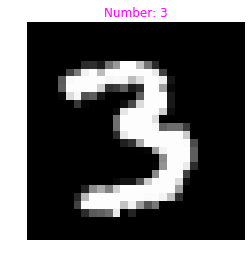

In [0]:
# check the prediction for the 500th test example
check_pred(500)